In [ ]:
import pandas as pd
import os


In [ ]:
csv_files = [
    '/content/ResaleFlatPricesBasedonApprovalDate19901999.csv',
    '/content/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv',
    '/content/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv',
    '/content/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv',
    '/content/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv'
]


In [ ]:
merged_data = pd.DataFrame()


In [ ]:
for file in csv_files:
    file_path = os.path.join('path_to_csv_files', file)  # Provide the correct path to your CSV files
    data = pd.read_csv(file_path)
    merged_data = merged_data.append(data)


FileNotFoundError: ignored

In [ ]:
merged_data.to_csv('Singapore Resale Flat Prices.csv', index=False)


In [ ]:
df=pd.read_csv('Singapore Resale Flat Prices.csv')

In [ ]:
df

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# **Loading Dataset**

In [ ]:
df=pd.read_csv('Singapore Resale Flat Prices.csv')

# **Data Analysis**

In [ ]:
# Checking size(rows,columns) of dataset
df.shape

(911027, 10)

In [ ]:
#To display top 5 row in dataset
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0


In [ ]:
#To display Bottom 5 rows
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
911022,2023-10,YISHUN,5 ROOM,336C,YISHUN ST 31,13 TO 15,112.0,Improved,2015,670000.0
911023,2023-10,YISHUN,EXECUTIVE,406,YISHUN AVE 6,07 TO 09,148.0,Maisonette,1988,830000.0
911024,2023-10,YISHUN,EXECUTIVE,391,YISHUN AVE 6,04 TO 06,142.0,Apartment,1988,753000.0
911025,2023-10,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,808000.0
911026,2023-10,YISHUN,EXECUTIVE,641,YISHUN ST 61,07 TO 09,164.0,Apartment,1992,980000.0


In [ ]:
#To view the column names
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

In [ ]:
df = df.drop(['month','street_name','lease_commence_date', 'block','flat_model'], axis=1)

In [ ]:
df

,town,flat_type,storey_range,floor_area_sqm,resale_price
0,ANG MO KIO,1 ROOM,10 TO 12,31.0,9000.0
1,ANG MO KIO,1 ROOM,04 TO 06,31.0,6000.0
2,ANG MO KIO,1 ROOM,10 TO 12,31.0,8000.0
3,ANG MO KIO,1 ROOM,07 TO 09,31.0,6000.0
4,ANG MO KIO,3 ROOM,04 TO 06,73.0,47200.0
...,...,...,...,...,...
911022,YISHUN,5 ROOM,13 TO 15,112.0,670000.0
911023,YISHUN,EXECUTIVE,07 TO 09,148.0,830000.0
911024,YISHUN,EXECUTIVE,04 TO 06,142.0,753000.0
911025,YISHUN,EXECUTIVE,10 TO 12,142.0,808000.0


# **Data Preprocessing**

**Missing Values**

In [ ]:
#checking for null values
df.isnull().sum()

town              0
flat_type         0
storey_range      0
floor_area_sqm    0
resale_price      0
dtype: int64

There is no null values in the dataset

**Checking Data Type**

In [ ]:
df.dtypes

town               object
flat_type          object
storey_range       object
floor_area_sqm    float64
resale_price      float64
dtype: object

In [ ]:
# Let's rename the column so it will be clearer
df = df.rename(columns={'flat_type':'number_of_rooms','storey_range':'storey'})

In [ ]:
df

,town,number_of_rooms,storey,floor_area_sqm,resale_price
0,ANG MO KIO,1 ROOM,10 TO 12,31.0,9000.0
1,ANG MO KIO,1 ROOM,04 TO 06,31.0,6000.0
2,ANG MO KIO,1 ROOM,10 TO 12,31.0,8000.0
3,ANG MO KIO,1 ROOM,07 TO 09,31.0,6000.0
4,ANG MO KIO,3 ROOM,04 TO 06,73.0,47200.0
...,...,...,...,...,...
911022,YISHUN,5 ROOM,13 TO 15,112.0,670000.0
911023,YISHUN,EXECUTIVE,07 TO 09,148.0,830000.0
911024,YISHUN,EXECUTIVE,04 TO 06,142.0,753000.0
911025,YISHUN,EXECUTIVE,10 TO 12,142.0,808000.0


In [ ]:
print("Unique values of town \n")
print(df['town'].unique())

Unique values of town 

['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT TIMAH'
 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG' 'HOUGANG'
 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'QUEENSTOWN' 'SENGKANG' 'SERANGOON' 'TAMPINES' 'TOA PAYOH' 'WOODLANDS'
 'YISHUN' 'LIM CHU KANG' 'SEMBAWANG' 'BUKIT PANJANG' 'PASIR RIS' 'PUNGGOL']


In [ ]:
print("Unique values of number_of_rooms \n")
print(df['number_of_rooms'].unique())

Unique values of number_of_rooms 

['1 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' '2 ROOM' 'EXECUTIVE'
 'MULTI GENERATION' 'MULTI-GENERATION']


In [ ]:
# I assume EXECUTIVE is equal to a 6 room (5 room + 1 study room). MULTI-GENERATION is equal to a 5 room (it served the same purpose).
df['number_of_rooms'] = df['number_of_rooms'].str.replace(r'EXECUTIVE','6 ROOM',regex=True)
df['number_of_rooms'] = df['number_of_rooms'].str.replace(r'MULTI-GENERATION','5 ROOM',regex=True)
df['number_of_rooms'] = df['number_of_rooms'].str.replace(r'MULTI GENERATION','5 ROOM',regex=True)
df['number_of_rooms'] = df['number_of_rooms'].str.replace(r'ROOM','',regex=True).astype('int')

In [ ]:
df

,town,number_of_rooms,storey,floor_area_sqm,resale_price
0,ANG MO KIO,1,10 TO 12,31.0,9000.0
1,ANG MO KIO,1,04 TO 06,31.0,6000.0
2,ANG MO KIO,1,10 TO 12,31.0,8000.0
3,ANG MO KIO,1,07 TO 09,31.0,6000.0
4,ANG MO KIO,3,04 TO 06,73.0,47200.0
...,...,...,...,...,...
911022,YISHUN,5,13 TO 15,112.0,670000.0
911023,YISHUN,6,07 TO 09,148.0,830000.0
911024,YISHUN,6,04 TO 06,142.0,753000.0
911025,YISHUN,6,10 TO 12,142.0,808000.0


In [ ]:
# I assume that rather we use floor range, I the possible highest floor within the unit storey range.
df['storey'] = df['storey'].str[-2:].astype('int')

In [ ]:
df

,town,number_of_rooms,storey,floor_area_sqm,resale_price
0,ANG MO KIO,1,12,31.0,9000.0
1,ANG MO KIO,1,6,31.0,6000.0
2,ANG MO KIO,1,12,31.0,8000.0
3,ANG MO KIO,1,9,31.0,6000.0
4,ANG MO KIO,3,6,73.0,47200.0
...,...,...,...,...,...
911022,YISHUN,5,15,112.0,670000.0
911023,YISHUN,6,9,148.0,830000.0
911024,YISHUN,6,6,142.0,753000.0
911025,YISHUN,6,12,142.0,808000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911027 entries, 0 to 911026
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   town             911027 non-null  object 
 1   number_of_rooms  911027 non-null  int64  
 2   storey           911027 non-null  int64  
 3   floor_area_sqm   911027 non-null  float64
 4   resale_price     911027 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.8+ MB


**Outlier Deduction and Correction**

In [ ]:
# Let see the statistic information of the data
df.describe()

,number_of_rooms,storey,floor_area_sqm,resale_price
count,911027.000000,911027.000000,911027.000000,9.110270e+05
mean,4.012052,8.679818,95.699382,3.159840e+05
std,0.946393,4.800735,25.858260,1.663710e+05
min,1.000000,3.000000,28.000000,5.000000e+03
25%,3.000000,6.000000,73.000000,1.900000e+05
50%,4.000000,9.000000,93.000000,2.930000e+05
75%,5.000000,12.000000,113.000000,4.100000e+05
max,6.000000,51.000000,307.000000,1.500000e+06


**number_of_rooms**

**IQR**

In [ ]:
#detecting Outlier for number_of_rooms column
iqr = df['number_of_rooms'].quantile(0.75) - df['number_of_rooms'].quantile(0.25)
upper_threshold = df['number_of_rooms'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['number_of_rooms'].quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(8.0, 0.0)

**BOx PLOT**

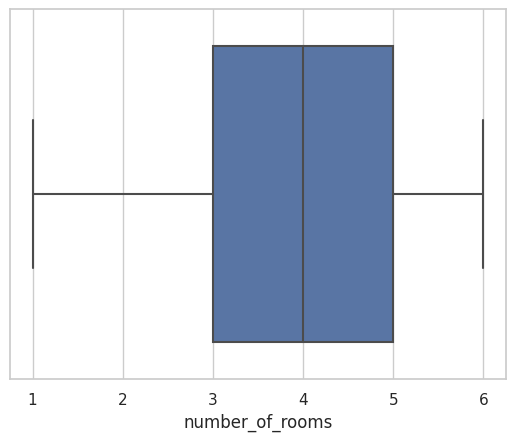

In [ ]:
# Create a boxplot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot

# Specify the column(s) you want to create a boxplot for
sns.boxplot(x=df['number_of_rooms'])

# Show the boxplot
plt.show()

**storey**

**IQR**

In [ ]:
#detecting Outlier for storey column
iqr = df['storey'].quantile(0.75) - df['storey'].quantile(0.25)
upper_threshold = df['storey'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['storey'].quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(21.0, -3.0)

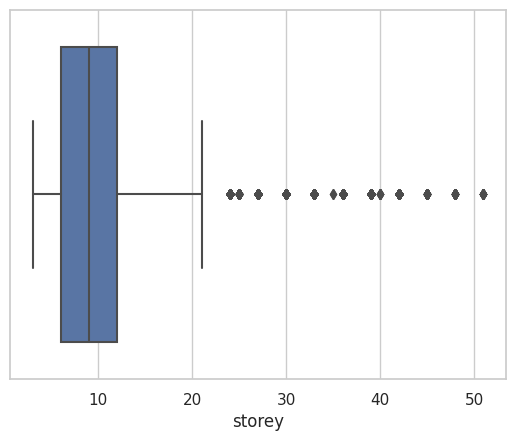

In [ ]:
# Create a boxplot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot

# Specify the column(s) you want to create a boxplot for
sns.boxplot(x=df['storey'])

# Show the boxplot
plt.show()

In [ ]:
#removing outlier for storey column
# Clip/ Strip is used to detuct value to lower & upper threshold.
df.storey	 = df.storey	.clip(lower_threshold, upper_threshold)

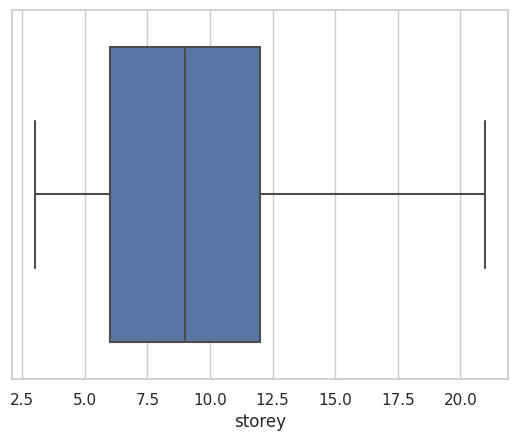

In [ ]:
# Create a boxplot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot

# Specify the column(s) you want to create a boxplot for
sns.boxplot(x=df['storey'])

# Show the boxplot
plt.show()

**floor_area_sqm**

**IQR**

In [ ]:
#detecting Outlier for floor_area_sqm column
iqr = df['floor_area_sqm'].quantile(0.75) - df['floor_area_sqm'].quantile(0.25)
upper_threshold = df['floor_area_sqm'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['floor_area_sqm'].quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(173.0, 13.0)

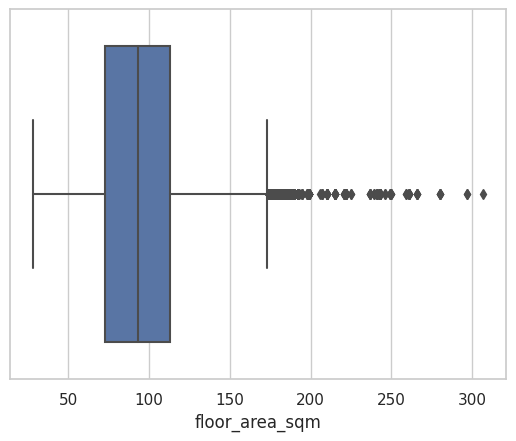

In [ ]:
# Create a boxplot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot

# Specify the column(s) you want to create a boxplot for
sns.boxplot(x=df['floor_area_sqm'])

# Show the boxplot
plt.show()

In [ ]:
#removing outlier for storey column
# Clip/ Strip is used to detuct value to lower & upper threshold.
df.floor_area_sqm	 = df.floor_area_sqm	.clip(lower_threshold, upper_threshold)

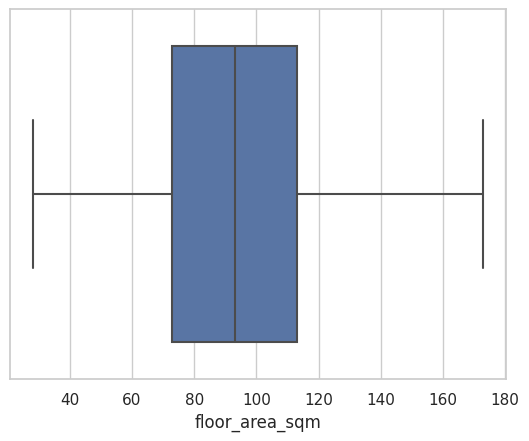

In [ ]:
# Create a boxplot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot

# Specify the column(s) you want to create a boxplot for
sns.boxplot(x=df['floor_area_sqm'])

# Show the boxplot
plt.show()

In [ ]:
#detecting Outlier for floor_area_sqm column
iqr = df['resale_price'].quantile(0.75) - df['resale_price'].quantile(0.25)
upper_threshold = df['resale_price'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['resale_price'].quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(740000.0, -140000.0)

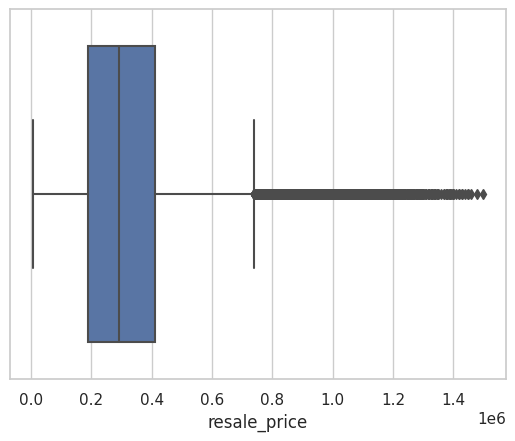

In [ ]:
# Create a boxplot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot

# Specify the column(s) you want to create a boxplot for
sns.boxplot(x=df['resale_price'])

# Show the boxplot
plt.show()

In [ ]:
#removing outlier for storey column
# Clip/ Strip is used to detuct value to lower & upper threshold.
df.resale_price	 = df.resale_price	.clip(lower_threshold, upper_threshold)

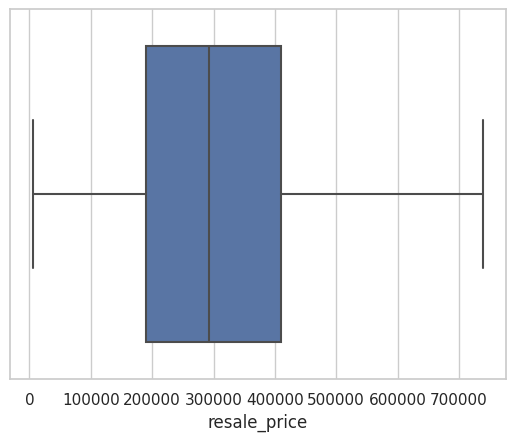

In [ ]:
# Create a boxplot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot

# Specify the column(s) you want to create a boxplot for
sns.boxplot(x=df['resale_price'])

# Show the boxplot
plt.show()

# EDA - Exploratory Data Analysis

In [ ]:
number_of_rooms_counts = df['number_of_rooms'].value_counts()
number_of_rooms_counts

4    345395
3    292009
5    192298
6     68660
2     11366
1      1299
Name: number_of_rooms, dtype: int64

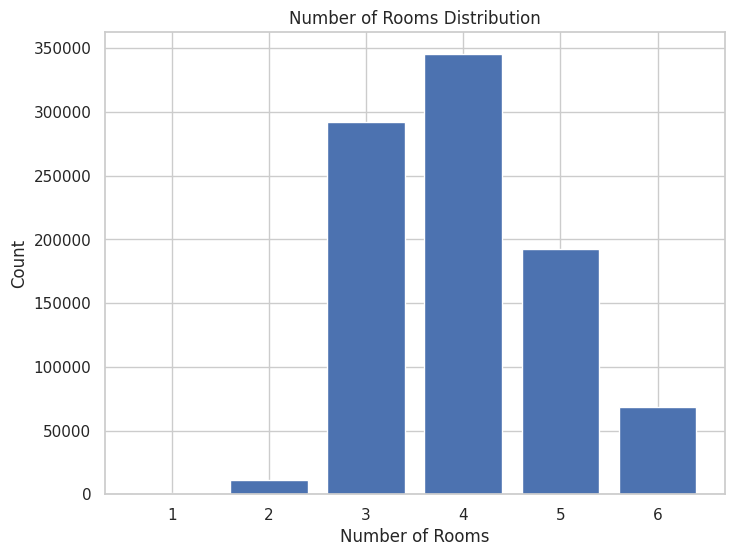

In [ ]:
# Assuming 'number_of_rooms' is the column you want to plot
number_of_rooms = df['number_of_rooms']

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(number_of_rooms.value_counts().index, number_of_rooms.value_counts())

# Add labels and title
plt.xlabel('Number of Rooms')
plt.ylabel('Count')
plt.title('Number of Rooms Distribution')

# Show the plot
plt.show()


In [ ]:
number_of_rooms_counts = df['storey'].value_counts()
number_of_rooms_counts

6     228876
9     206741
3     183543
12    175925
15     61713
21     25318
18     23472
5       2700
10      2474
20       265
Name: storey, dtype: int64

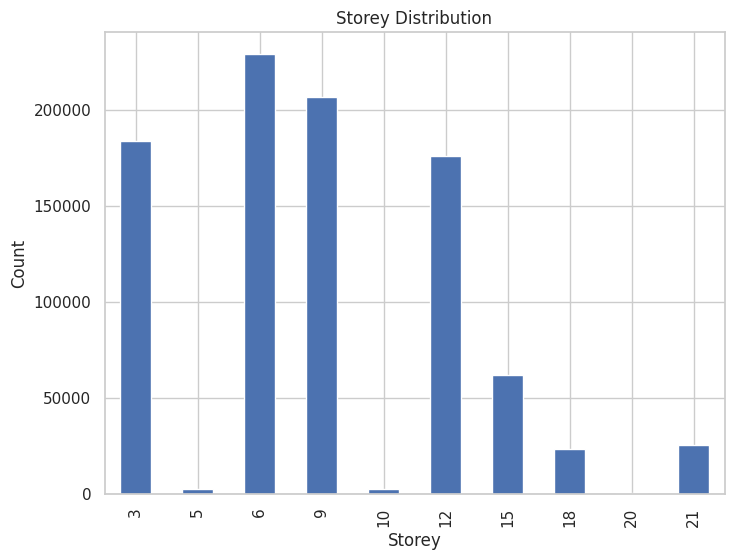

In [ ]:
# Assuming 'storey' is the column you want to plot
storey_data = df['storey']

# Create a bar plot
plt.figure(figsize=(8, 6))
storey_counts = storey_data.value_counts().sort_index()
storey_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Storey')
plt.ylabel('Count')
plt.title('Storey Distribution')

# Show the plot
plt.show()

In [ ]:
town_counts = df['town'].value_counts()
town_counts

TAMPINES           78842
YISHUN             68955
BEDOK              65863
JURONG WEST        65544
WOODLANDS          64359
ANG MO KIO         51459
HOUGANG            49780
BUKIT BATOK        43415
CHOA CHU KANG      37585
BUKIT MERAH        33747
PASIR RIS          32836
SENGKANG           31316
TOA PAYOH          31110
QUEENSTOWN         28380
GEYLANG            27837
CLEMENTI           27713
BUKIT PANJANG      27206
KALLANG/WHAMPOA    26712
JURONG EAST        24454
SERANGOON          22562
BISHAN             21054
PUNGGOL            19487
SEMBAWANG          13259
MARINE PARADE       7966
CENTRAL AREA        7039
BUKIT TIMAH         2483
LIM CHU KANG          64
Name: town, dtype: int64

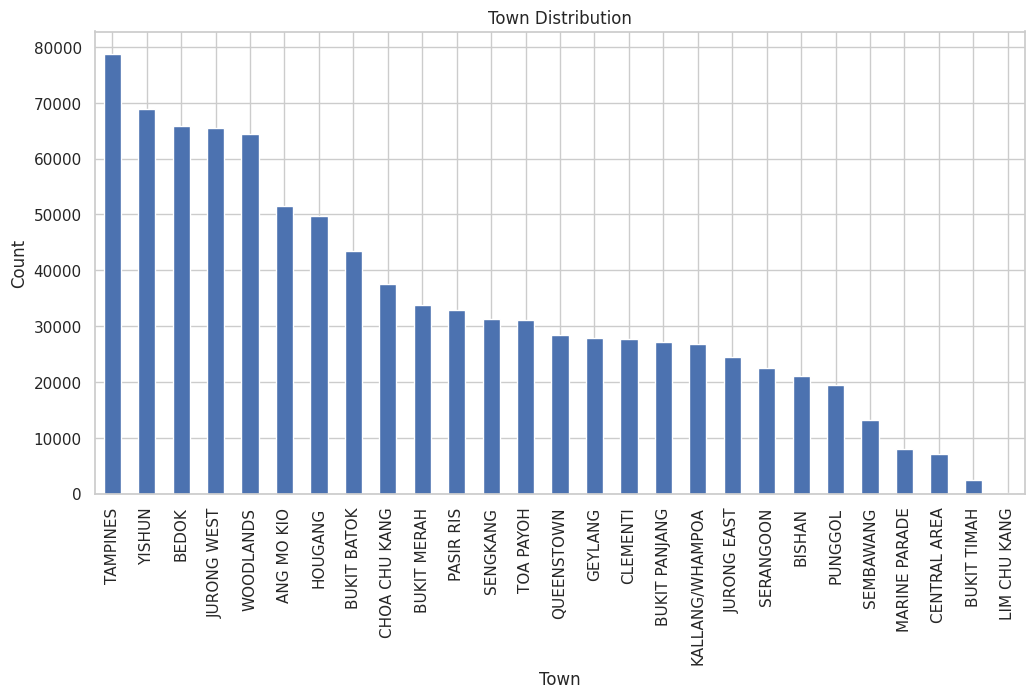

In [ ]:
# Assuming 'town' is the column you want to plot
town_data = df['town']

# Create a bar plot
plt.figure(figsize=(12, 6))  # Optional: Set the figure size
town_counts = town_data.value_counts()
town_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Town')
plt.ylabel('Count')
plt.title('Town Distribution')

# Show the plot
plt.xticks(rotation=90)  # Rotate the town names on the x-axis for readability
plt.show()

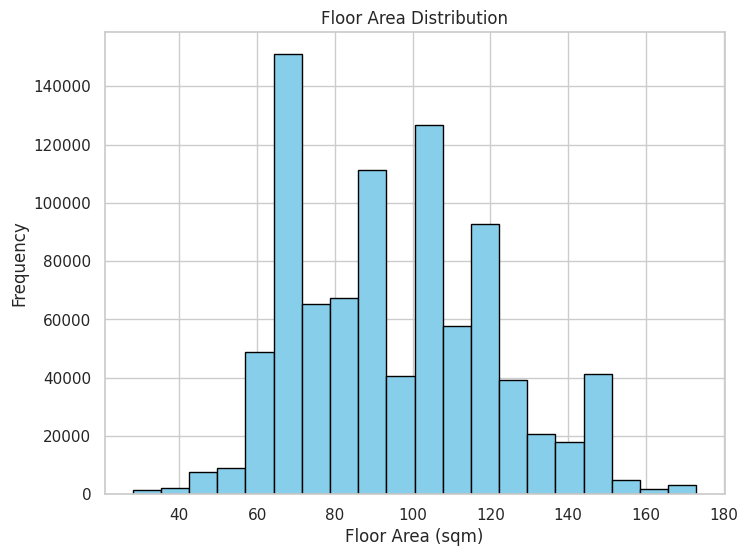

In [ ]:
# Assuming 'floor_area_sqm' is the column you want to plot
floor_area_sqm = df['floor_area_sqm']

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(floor_area_sqm, bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Frequency')
plt.title('Floor Area Distribution')

# Show the plot
plt.show()

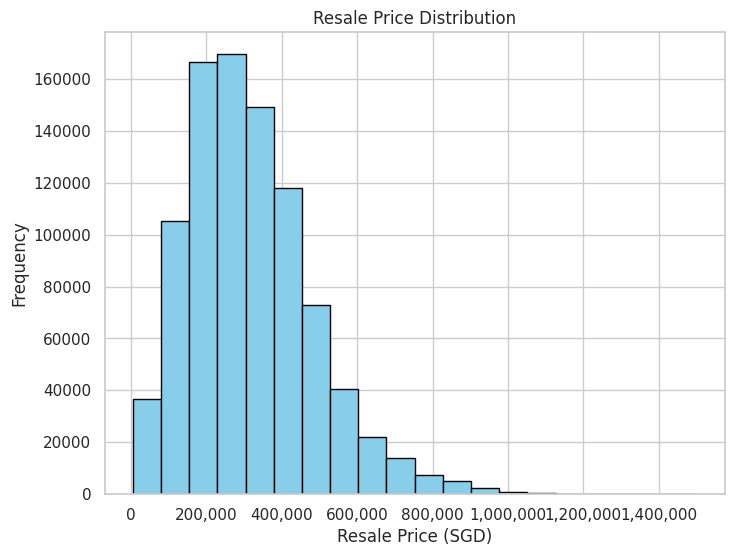

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Assuming 'resale_price' is the column you want to plot
resale_price_data = df['resale_price']

# Create a histogram
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.hist(resale_price_data, bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Resale Price (SGD)')
plt.ylabel('Frequency')
plt.title('Resale Price Distribution')

# Format the x-axis tick labels
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Show the plot
plt.show()


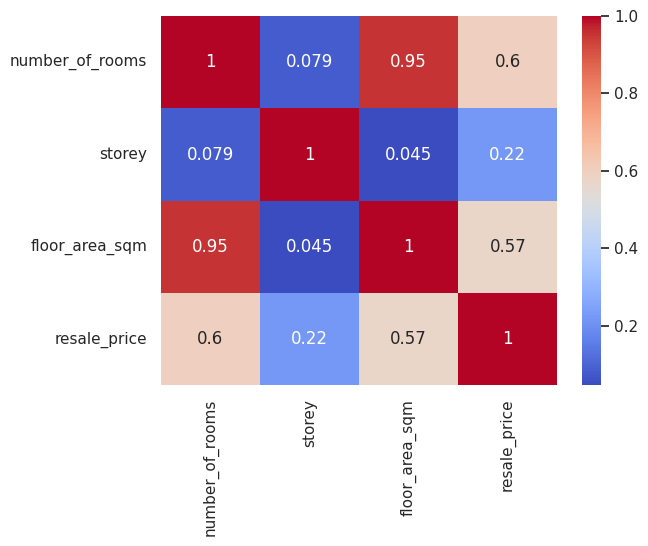

In [ ]:
# calculate correlation matrix
corr = df.corr()

# plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
# encode categorical variables
le = LabelEncoder()
df['town'] = le.fit_transform(df['town'])



In [ ]:
df

,town,number_of_rooms,storey,floor_area_sqm,resale_price
0,0,1,12,31.0,9000.0
1,0,1,6,31.0,6000.0
2,0,1,12,31.0,8000.0
3,0,1,9,31.0,6000.0
4,0,3,6,73.0,47200.0
...,...,...,...,...,...
911022,26,5,15,112.0,670000.0
911023,26,6,9,148.0,830000.0
911024,26,6,6,142.0,753000.0
911025,26,6,12,142.0,808000.0


In [ ]:
X = df[['town', 'number_of_rooms', 'storey', 'floor_area_sqm']].values
y=df['resale_price'].values

In [ ]:
# splitting the data as train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 3 )

In [ ]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
mlr_ypred = mlr.predict(X_test)
mlr_acc = r2_score(y_test,mlr_ypred)
mlr_acc

0.4090359427172231

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_r = DecisionTreeRegressor()
tree_r.fit(X_train, y_train)
tree_ypred = tree_r.predict(X_test)
tree_acc = r2_score(y_test,tree_ypred)
tree_acc

0.5699484899223286

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_r = RandomForestRegressor(n_estimators = 10)
forest_r.fit(X_train, y_train)
forest_ypred = forest_r.predict(X_test)
forest_acc = r2_score(y_test,forest_ypred)
forest_acc

0.5708312208678064